## General requirements for the assignment
- Make appropriate comments to your code
- Use Markdown cells to provide your answers (when applicable)
- Add your code when there is the comment "YOUR CODE HERE".
- Stick to Pep8 standard as much as possible for your coding
- Submit through GitHub
- Tag the commit as *Final submission of Assignment 1*
- Post (interesting) errors in the course Github's issue page
  
## Assignment Intro
In this assignment, you will be working with data imports. Data is provided to you both to be downloaded locally and accessed remotely. The final deliverable for the assignment is this ipython notebook with the executed cells active and submitted through your personal GitHub accounts. You will be importing data, conduct some basic data exploration and finally exporting the data and saving it for future use.  

You will be working with this data for the other two GO/NOGO assignments as well. The data is from the Google mobility report. You can find more information about this data here: <https://www.google.com/covid19/mobility/data_documentation.html?hl=en>.

### DEADLINE FOR THIS ASSIGNMENT IS 17 SEPTEMBER 2021 BEFORE 23:59

<hr />


## Import libraries
Update this list as you go along with the assignment

In [8]:
# YOUR CODE HERE
# import libraries
import pandas as pd
import os
import requests
import json
import csv
import matplotlib.pyplot as plt
import time

# PART I - Data Import and Export

#### 1. Download mobility data from this [link](https://www.google.com/covid19/mobility/), choose *Region CSVs*. From the downloaded data, pick a country to work with. Why did you choose this country?

In [2]:
# path to the downloaded data folder, e.g. 'Downloads/Region_Mobility_Report_CSVs/'
data_dir = './processed_data/Region_Mobility_Report_CSVs/'
country_code = 'CH'


#### 2. Find the path to the data of your selection. We have prepared some sample code. You need to fill in some parts indicated by 'YOUR CODE HERE'.

In [3]:
all_files = os.listdir(data_dir)
# initilisation
target_file_name = '2020_CH_Region_Mobility_Report'
year = '2020'

for file_name in all_files:
    # check if this file is for 2020
    is_year =2020 # YOUR CODE HERE
    # if yes, we check if the file name is for the country that you select
    if is_year:
        # check if the country_code is in the file_name
        is_country = 'CH' # YOUR CODE HERE
        if is_country:
            # found the file, save it to 'target_file_name'
            target_file_name = '2020_CH_Region_Mobility_Report' # YOUR CODE HERE
            # we stop looking by breaking out of the for loop
            break
if not target_file_name:
    print('File not found. Check your country code (or select a different one)!')
else:
    print('Found file name is: ' + target_file_name)
    # get the path to the file
    file_path = '2020_CH_Region_Mobility_Report'# YOUR CODE HERE
    print('Path to the file is: ' + file_path)


Found file name is: 2020_CH_Region_Mobility_Report
Path to the file is: 2020_CH_Region_Mobility_Report


#### 3. Import the 2020 data for this country as a pandas data frame and name it as `df_2020`. Print the first 10 lines of `df_2020`

In [5]:
# YOUR CODE HERE
df_2020 = pd.read_csv('./processed_data/Region_Mobility_Report_CSVs/2020_CH_Region_Mobility_Report.csv')
df_2020.head(10)

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,CH,Switzerland,NaN,NaN,NaN,NaN,NaN,ChIJYW1Zb-9kjEcRFXvLDxG1Vlw,2020-02-15,-1.0,-1.0,31.0,6.0,-2.0,-1.0
1,CH,Switzerland,NaN,NaN,NaN,NaN,NaN,ChIJYW1Zb-9kjEcRFXvLDxG1Vlw,2020-02-16,10.0,12.0,30.0,8.0,-2.0,-1.0
2,CH,Switzerland,NaN,NaN,NaN,NaN,NaN,ChIJYW1Zb-9kjEcRFXvLDxG1Vlw,2020-02-17,-3.0,-4.0,-3.0,-2.0,-1.0,1.0
3,CH,Switzerland,NaN,NaN,NaN,NaN,NaN,ChIJYW1Zb-9kjEcRFXvLDxG1Vlw,2020-02-18,3.0,1.0,34.0,3.0,-2.0,1.0
4,CH,Switzerland,NaN,NaN,NaN,NaN,NaN,ChIJYW1Zb-9kjEcRFXvLDxG1Vlw,2020-02-19,-4.0,-4.0,-11.0,-4.0,-3.0,1.0
5,CH,Switzerland,NaN,NaN,NaN,NaN,NaN,ChIJYW1Zb-9kjEcRFXvLDxG1Vlw,2020-02-20,2.0,-1.0,46.0,5.0,-5.0,0.0
6,CH,Switzerland,NaN,NaN,NaN,NaN,NaN,ChIJYW1Zb-9kjEcRFXvLDxG1Vlw,2020-02-21,-1.0,-1.0,26.0,1.0,-6.0,1.0
7,CH,Switzerland,NaN,NaN,NaN,NaN,NaN,ChIJYW1Zb-9kjEcRFXvLDxG1Vlw,2020-02-22,1.0,0.0,57.0,14.0,-1.0,-2.0
8,CH,Switzerland,NaN,NaN,NaN,NaN,NaN,ChIJYW1Zb-9kjEcRFXvLDxG1Vlw,2020-02-23,14.0,18.0,27.0,13.0,0.0,-1.0
9,CH,Switzerland,NaN,NaN,NaN,NaN,NaN,ChIJYW1Zb-9kjEcRFXvLDxG1Vlw,2020-02-24,6.0,3.0,74.0,7.0,-3.0,0.0


#### We have also stored the data in a remote server. The data for a particular country can be retrieved with the following API:
`http://mirrors-dev.citg.tudelft.nl:8083/google-mobility-data/{yy}/{CC}` 
#### where yy is either 2020 or 2021, and CC is a 2-letter country code. For example, to get data for 2020 for the Netherlands, the API will be: <http://mirrors-dev.citg.tudelft.nl:8083/google-mobility-data/2020/NL>


#### 4. Download the mobility report data of **2021** for the same country (that you have chosen above) using this API and name it as `df_2021`.  Print the first 10 lines of the dataframe

In [10]:
# YOUR CODE HERE
h = requests.get('http://mirrors-dev.citg.tudelft.nl:8083/google-mobility-data/2021/CH').text
h = h.split('\n')
for i in h:
    with open('test.txt','a+',encoding='utf-8')as f:
        f.write(i+'\n')
time.sleep(4)

out = open('df_2021.csv','w',newline='')
csv_writer = csv.writer(out,dialect='excel')

f = open("test.txt","r")
for line in f.readlines():
     line=line.replace(',','\t')   #将每行的逗号替换成空格
     list1 = line.split()          #将字符串转为列表，从而可以按单元格写入csv
     csv_writer.writerow(list1)

df_2021 = pd.read_csv('df_2021.csv')
df_2021.head(10)


,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,CH,Switzerland,ChIJYW1Zb-9kjEcRFXvLDxG1Vlw,2021-01-01,-87,-90,8,-66,-86,30,NaN,NaN,NaN,NaN,NaN
1,CH,Switzerland,ChIJYW1Zb-9kjEcRFXvLDxG1Vlw,2021-01-02,-62,-38,-17,-46,-37,14,NaN,NaN,NaN,NaN,NaN
2,CH,Switzerland,ChIJYW1Zb-9kjEcRFXvLDxG1Vlw,2021-01-03,-66,-53,-11,-44,-24,9,NaN,NaN,NaN,NaN,NaN
3,CH,Switzerland,ChIJYW1Zb-9kjEcRFXvLDxG1Vlw,2021-01-04,-36,3,-16,-37,-32,14,NaN,NaN,NaN,NaN,NaN
4,CH,Switzerland,ChIJYW1Zb-9kjEcRFXvLDxG1Vlw,2021-01-05,-38,0,-7,-37,-33,15,NaN,NaN,NaN,NaN,NaN
5,CH,Switzerland,ChIJYW1Zb-9kjEcRFXvLDxG1Vlw,2021-01-06,-44,-11,-21,-39,-34,16,NaN,NaN,NaN,NaN,NaN
6,CH,Switzerland,ChIJYW1Zb-9kjEcRFXvLDxG1Vlw,2021-01-07,-42,-4,-5,-36,-31,15,NaN,NaN,NaN,NaN,NaN
7,CH,Switzerland,ChIJYW1Zb-9kjEcRFXvLDxG1Vlw,2021-01-08,-43,-2,-5,-36,-30,16,NaN,NaN,NaN,NaN,NaN
8,CH,Switzerland,ChIJYW1Zb-9kjEcRFXvLDxG1Vlw,2021-01-09,-42,-2,-12,-37,-20,10,NaN,NaN,NaN,NaN,NaN
9,CH,Switzerland,ChIJYW1Zb-9kjEcRFXvLDxG1Vlw,2021-01-10,-61,-65,14,-38,-24,8,NaN,NaN,NaN,NaN,NaN


#### 5. Combine the two dataframes `df_2020` and `df_2021` into a new dataframe `df`. Print the last 10 lines of `df`.

In [11]:
# YOUR CODE HERE
new_df = df_2020.append(df_2021)
new_df.tail(10)

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
12546,CH,Switzerland,Zurich,CH-ZH,ChIJa_ltU3EKkEcRfy571124_mM,2021-07-09,-11,20,133,-13,-23,6,NaN,NaN,NaN
12547,CH,Switzerland,Zurich,CH-ZH,ChIJa_ltU3EKkEcRfy571124_mM,2021-07-10,-12,10,178,-1,6,-2,NaN,NaN,NaN
12548,CH,Switzerland,Zurich,CH-ZH,ChIJa_ltU3EKkEcRfy571124_mM,2021-07-11,-2,24,96,-2,8,-1,NaN,NaN,NaN
12549,CH,Switzerland,Zurich,CH-ZH,ChIJa_ltU3EKkEcRfy571124_mM,2021-07-12,-12,14,141,-13,-28,7,NaN,NaN,NaN
12550,CH,Switzerland,Zurich,CH-ZH,ChIJa_ltU3EKkEcRfy571124_mM,2021-07-13,-16,10,29,-16,-26,11,NaN,NaN,NaN
12551,CH,Switzerland,Zurich,CH-ZH,ChIJa_ltU3EKkEcRfy571124_mM,2021-07-14,-10,15,50,-15,-25,8,NaN,NaN,NaN
12552,CH,Switzerland,Zurich,CH-ZH,ChIJa_ltU3EKkEcRfy571124_mM,2021-07-15,-14,15,9,-17,-26,9,NaN,NaN,NaN
12553,CH,Switzerland,Zurich,CH-ZH,ChIJa_ltU3EKkEcRfy571124_mM,2021-07-16,-14,14,73,-15,-25,8,NaN,NaN,NaN
12554,CH,Switzerland,Zurich,CH-ZH,ChIJa_ltU3EKkEcRfy571124_mM,2021-07-17,-14,6,68,-6,1,0,NaN,NaN,NaN
12555,CH,Switzerland,Zurich,CH-ZH,ChIJa_ltU3EKkEcRfy571124_mM,2021-07-18,-8,11,79,-4,-1,-1,NaN,NaN,NaN


#### 6. `df` now contains mobility data for your selected country from 2020 and 2021. There are three aggregation levels to this data, namely national (`country_region`), provincial (`sub_region_1`), and city (`sub_region_2`). Separate these data into three different dataframes, namely `df_nation`, `df_province`, and `df_city`.  Print the first 5 lines of each of them.  

Hint:
- For the national data, `sub_region_1` and `sub_region_2` are NaN.
- For the provincial data, `sub_region_2` is NaN.
- For the city data, `country_region`, `sub_region_1` and `sub_region_2` are not NaN.
- Logical operators: <https://realpython.com/python-bitwise-operators/>
- Use pandas [isna()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isna.html) function 

In [12]:
# YOUR CODE HERE
df_nation = new_df['country_region']
df_nation.head(5)

0    Switzerland
1    Switzerland
2    Switzerland
3    Switzerland
4    Switzerland
Name: country_region, dtype: object

In [13]:
df_province = new_df['sub_region_1']
df_province.head(5)

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: sub_region_1, dtype: object

In [14]:
df_city = new_df['sub_region_2']
df_city.head(5)

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: sub_region_2, dtype: object

#### 7. Save `df_nation`, `df_province`, and `df_city` into csv files under folder 'processed_data', and locate this folder under `data_dir`. Name the files `{CC}_nation.csv`, `{CC}_province.csv`, and `{CC}_city.csv`, respectively. `{CC}` stands for your selected country code.

In [15]:
# YOUR CODE HERE
df_nation.to_csv('./processed_data/Region_Mobility_Report_CSVs/CH_nation.csv')
df_province.to_csv('./processed_data/Region_Mobility_Report_CSVs/CH_province.csv')
df_city.to_csv('./processed_data/Region_Mobility_Report_CSVs/CH_city.csv')

D:\rgzn\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  
D:\rgzn\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  This is separate from the ipykernel package so we can avoid doing imports until
D:\rgzn\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  after removing the cwd from sys.path.


<hr />

# PART II - Simple Data Processing

#### 1. There are multiple activities in the mobility report such as workplaces, parks, transit stations, etc. For each of the activities, what are the average percent changes from baselines for your selected country?

In [16]:
# YOUR CODE HERE

workplace = []
parks = []
transit = []
for d in df_2020['workplaces_percent_change_from_baseline']:
    if pd.isnull(d) is False:
        workplace.append(d)
for d in df_2020['parks_percent_change_from_baseline']:
    if pd.isnull(d) is False:
        parks.append(d)
for d in df_2020['transit_stations_percent_change_from_baseline']:
    if pd.isnull(d) is False:
        transit.append(d)
        
avg_workplace = float(sum(workplace) / len(workplace))
avg_parks = float(sum(parks) / len(parks))
avg_transit = float(sum(transit) / len(transit))
print('average percent changes workplace:',avg_workplace)
print('average percent changes parks:',avg_parks)
print('average percent changes transit stations:',avg_transit)

average percent changes workplace: -22.577386123867445
average percent changes parks: 26.337659273242096
average percent changes transit stations: -20.529637896825395


#### 2. Let's look into data from different provinces. How many provinces are there in the data of your selected country? Print all of them.

In [17]:
# YOUR CODE HERE
province = []
df_2020 = pd.read_csv('./processed_data/Region_Mobility_Report_CSVs/2020_CH_Region_Mobility_Report.csv')
for d in df_2020['sub_region_1']:
    if pd.isnull(d) is False:
        province.append(d)

province1 = list(set(province))
province1

['Ticino',
 'Basel-Landschaft',
 'Jura',
 'Neuchâtel',
 'Grisons',
 'Solothurn',
 'Appenzell Innerrhoden',
 'Obwalden',
 'Basel City',
 'Uri',
 'Nidwalden',
 'Thurgau',
 'Aargau',
 'Valais',
 'Glarus',
 'Schaffhausen',
 'Canton of Bern',
 'St. Gallen',
 'Canton of Zug',
 'Geneva',
 'Fribourg',
 'Lucerne',
 'Vaud',
 'Zurich',
 'Appenzell Ausserrhoden',
 'Schwyz']

#### 3. You can get a summary of each of the provinces using pandas describe function. Using this, find which province experienced the largest (average) changes in workplaces.

In [18]:
# YOUR CODE HERE
workings_describe = df_2020.loc[:,['sub_region_1','workplaces_percent_change_from_baseline']]
workings_describe.dropna()
workings_describe.describe()
list2 = []
list3 = []
for i in df_2020['sub_region_1']:
    list2.append(i)
for j in df_2020['workplaces_percent_change_from_baseline']:
    list3.append(j)
for l in range(len(list3)):
    if list3[l] == 17.0:
        print(list2[l])

Jura
Solothurn


#### 4. Create a new dataframe that only contains data from the province with the largest changes in workplaces, which you found in the previous question.

In [19]:
# YOUR CODE HERE
workplaces_region_max = 17.0

#### 5. We're going to look at the changes of this province over time. As you can see, the column date is in string format. Convert this str date column data str to datetime format and append as an extra column called 'date2' to the dataframe.  
Hint: <https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html>

In [20]:
# YOUR CODE HERE
df_2020
date = df_2020['date']
date2 = pd.to_datetime(date)
df_2020.insert(df_2020.shape[1], 'date2', date2)
df_2020

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,date2
0,CH,Switzerland,NaN,NaN,NaN,NaN,NaN,ChIJYW1Zb-9kjEcRFXvLDxG1Vlw,2020-02-15,-1.0,-1.0,31.0,6.0,-2.0,-1.0,2020-02-15
1,CH,Switzerland,NaN,NaN,NaN,NaN,NaN,ChIJYW1Zb-9kjEcRFXvLDxG1Vlw,2020-02-16,10.0,12.0,30.0,8.0,-2.0,-1.0,2020-02-16
2,CH,Switzerland,NaN,NaN,NaN,NaN,NaN,ChIJYW1Zb-9kjEcRFXvLDxG1Vlw,2020-02-17,-3.0,-4.0,-3.0,-2.0,-1.0,1.0,2020-02-17
3,CH,Switzerland,NaN,NaN,NaN,NaN,NaN,ChIJYW1Zb-9kjEcRFXvLDxG1Vlw,2020-02-18,3.0,1.0,34.0,3.0,-2.0,1.0,2020-02-18
4,CH,Switzerland,NaN,NaN,NaN,NaN,NaN,ChIJYW1Zb-9kjEcRFXvLDxG1Vlw,2020-02-19,-4.0,-4.0,-11.0,-4.0,-3.0,1.0,2020-02-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8369,CH,Switzerland,Zurich,NaN,NaN,CH-ZH,NaN,ChIJa_ltU3EKkEcRfy571124_mM,2020-12-27,-67.0,-71.0,-25.0,-52.0,-26.0,9.0,2020-12-27
8370,CH,Switzerland,Zurich,NaN,NaN,CH-ZH,NaN,ChIJa_ltU3EKkEcRfy571124_mM,2020-12-28,-30.0,7.0,-27.0,-54.0,-66.0,23.0,2020-12-28
8371,CH,Switzerland,Zurich,NaN,NaN,CH-ZH,NaN,ChIJa_ltU3EKkEcRfy571124_mM,2020-12-29,-33.0,4.0,17.0,-51.0,-66.0,22.0,2020-12-29
8372,CH,Switzerland,Zurich,NaN,NaN,CH-ZH,NaN,ChIJa_ltU3EKkEcRfy571124_mM,2020-12-30,-35.0,16.0,-12.0,-52.0,-65.0,22.0,2020-12-30


#### 6. Sort the data in ascending order of time and save it as 'df_province_largest'

In [21]:
# YOUR CODE HERE
df_province_largest = df_2020.sort_values(by = 'date2')
df_province_largest

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,date2
0,CH,Switzerland,NaN,NaN,NaN,NaN,NaN,ChIJYW1Zb-9kjEcRFXvLDxG1Vlw,2020-02-15,-1.0,-1.0,31.0,6.0,-2.0,-1.0,2020-02-15
321,CH,Switzerland,Aargau,NaN,NaN,CH-AG,NaN,ChIJK32y9fMXkEcRfc5XB_gNGvg,2020-02-15,1.0,1.0,27.0,10.0,-1.0,-1.0,2020-02-15
3996,CH,Switzerland,Lucerne,NaN,NaN,CH-LU,NaN,ChIJIQ3mFsjlj0cRINcYQIj_AAE,2020-02-15,-2.0,-2.0,44.0,8.0,-3.0,-2.0,2020-02-15
7411,CH,Switzerland,Valais,NaN,NaN,CH-VS,NaN,ChIJF5p_6psij0cRYNgYQIj_AAE,2020-02-15,13.0,10.0,23.0,27.0,1.0,-1.0,2020-02-15
1470,CH,Switzerland,Basel-Landschaft,NaN,NaN,CH-BL,NaN,ChIJNQdrO_i1kUcRE3lb88jFOqw,2020-02-15,2.0,-1.0,NaN,12.0,3.0,-1.0,2020-02-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2423,CH,Switzerland,Canton of Zug,NaN,NaN,CH-ZG,NaN,ChIJgR05O1mqmkcRovjNQ3_Mi_U,2020-12-31,-39.0,23.0,NaN,-53.0,-72.0,22.0,2020-12-31
2744,CH,Switzerland,Fribourg,NaN,NaN,CH-FR,NaN,ChIJf_oOyunYjUcRAJfu1-gz8bg,2020-12-31,-42.0,25.0,40.0,-46.0,-66.0,16.0,2020-12-31
6475,CH,Switzerland,St. Gallen,NaN,NaN,CH-SG,NaN,ChIJoRAKiyTDmkcR6o3KFbp6rgs,2020-12-31,-36.0,27.0,86.0,-37.0,-67.0,19.0,2020-12-31
6154,CH,Switzerland,Solothurn,NaN,NaN,CH-SO,NaN,ChIJyQT15fgkjkcRNQMSD5syOis,2020-12-31,-53.0,21.0,NaN,-49.0,-68.0,20.0,2020-12-31


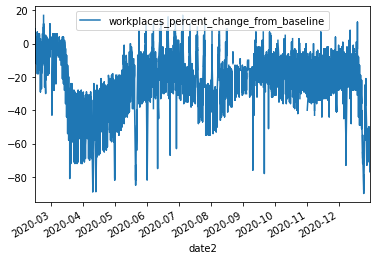

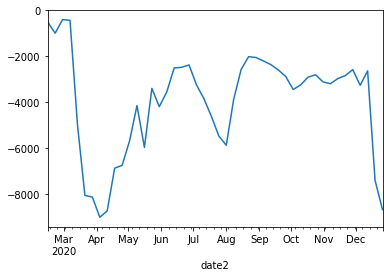

In [22]:
# Execute the cell with the following command to visualize the results
df_province_largest.plot('date2', 'workplaces_percent_change_from_baseline')
plt.show()
df_province_largest.resample('7D', on='date2').sum()['workplaces_percent_change_from_baseline'].plot()
plt.show()

#### 7. Compare the results above with the results in the google mobility report pdf of your selected province. Discuss the differences and similarities. Please save the mobility report pdf that you use to compare the results with! An example mobility report pdf can be found [here](https://www.gstatic.com/covid19/mobility/2021-09-01_AW_Mobility_Report_en.pdf)